# Wind Power generating Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
Location1=pd.read_csv("Location1.csv")
Location2=pd.read_csv("Location2.csv")
Location3=pd.read_csv("Location3.csv")
Location4=pd.read_csv("Location4.csv")

In [3]:
Location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [4]:
Location1.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
43795,2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796
43796,2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066
43797,2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336
43798,2021-12-31 22:00:00,34.4,96,33.5,2.40,4.62,45,51,4.2,0.2606
43799,2021-12-31 23:00:00,35.0,97,34.2,2.26,5.04,45,51,4.3,0.2877


In [5]:
Location1["Location"] = "Location1"
Location2["Location"] = "Location2"
Location3["Location"] = "Location3"
Location4["Location"] = "Location4"


In [6]:
Location1

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1
...,...,...,...,...,...,...,...,...,...,...,...
43795,2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796,Location1
43796,2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066,Location1
43797,2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336,Location1
43798,2021-12-31 22:00:00,34.4,96,33.5,2.40,4.62,45,51,4.2,0.2606,Location1


In [7]:
merge_data=pd.concat([Location1,Location2,Location3,Location4],axis=0)

In [8]:
merge_data

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1
...,...,...,...,...,...,...,...,...,...,...,...
43795,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,Location4
43796,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,Location4
43797,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,Location4
43798,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,Location4


In [9]:
merge_data.to_csv("merge_data.csv", index=False)

In [10]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175200 entries, 0 to 43799
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 16.0+ MB


In [11]:
merge_data.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000
mean,46.655994,70.155291,36.516241,4.157639,6.879334,201.589446,201.539070,8.038205,0.303429
std,22.012738,17.326678,20.933153,2.012682,3.043964,99.639040,100.683777,3.617488,0.257325
min,-31.200000,9.000000,-36.200000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,30.200000,57.000000,21.900000,2.630000,4.700000,130.000000,129.000000,5.300000,0.087700
50%,46.900000,72.000000,36.200000,3.850000,6.680000,211.000000,211.000000,7.600000,0.233100
75%,65.300000,84.000000,54.600000,5.380000,8.800000,288.000000,290.000000,10.300000,0.474200
max,101.700000,100.000000,78.700000,18.530000,24.590000,360.000000,360.000000,29.200000,0.999400


In [12]:
merge_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [13]:
merge_data.shape

(175200, 11)

In [14]:
merge_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location'],
      dtype='object')

In [15]:
merge_data.isnull()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
43795,False,False,False,False,False,False,False,False,False,False,False
43796,False,False,False,False,False,False,False,False,False,False,False
43797,False,False,False,False,False,False,False,False,False,False,False
43798,False,False,False,False,False,False,False,False,False,False,False


In [16]:
merge_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [17]:
merge_data = merge_data.drop_duplicates()


In [18]:
merge_data.drop(columns=["Time"], inplace=True)


In [19]:
merge_data.head(10)

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1
5,27.6,90,25.2,2.73,5.59,66,80,4.5,0.0778,Location1
6,26.7,92,24.9,2.10,5.82,65,78,4.7,0.0959,Location1
7,28.4,91,26.1,3.10,6.24,69,78,4.8,0.1141,Location1
8,30.2,88,27.0,3.54,6.89,74,81,5.8,0.1322,Location1
9,34.0,82,29.1,3.44,6.01,82,86,6.5,0.1503,Location1


In [20]:
merge_data = pd.get_dummies(merge_data, columns=["Location"], drop_first=True)
merge_data = merge_data.astype({col: int for col in merge_data.columns if col.startswith("Location_")})



In [21]:
merge_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


In [22]:
merge_data.tail()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
43795,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,0,0,1
43796,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,0,0,1
43797,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,0,0,1
43798,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,0,0,1
43799,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117,0,0,1


# EDA

In [23]:
numerical_col = merge_data.select_dtypes(include=['number']).columns
numerical_col

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Location_Location2', 'Location_Location3',
       'Location_Location4'],
      dtype='object')

In [24]:
merge_data.shape

(175200, 12)

IndexError: index 9 is out of bounds for axis 0 with size 9

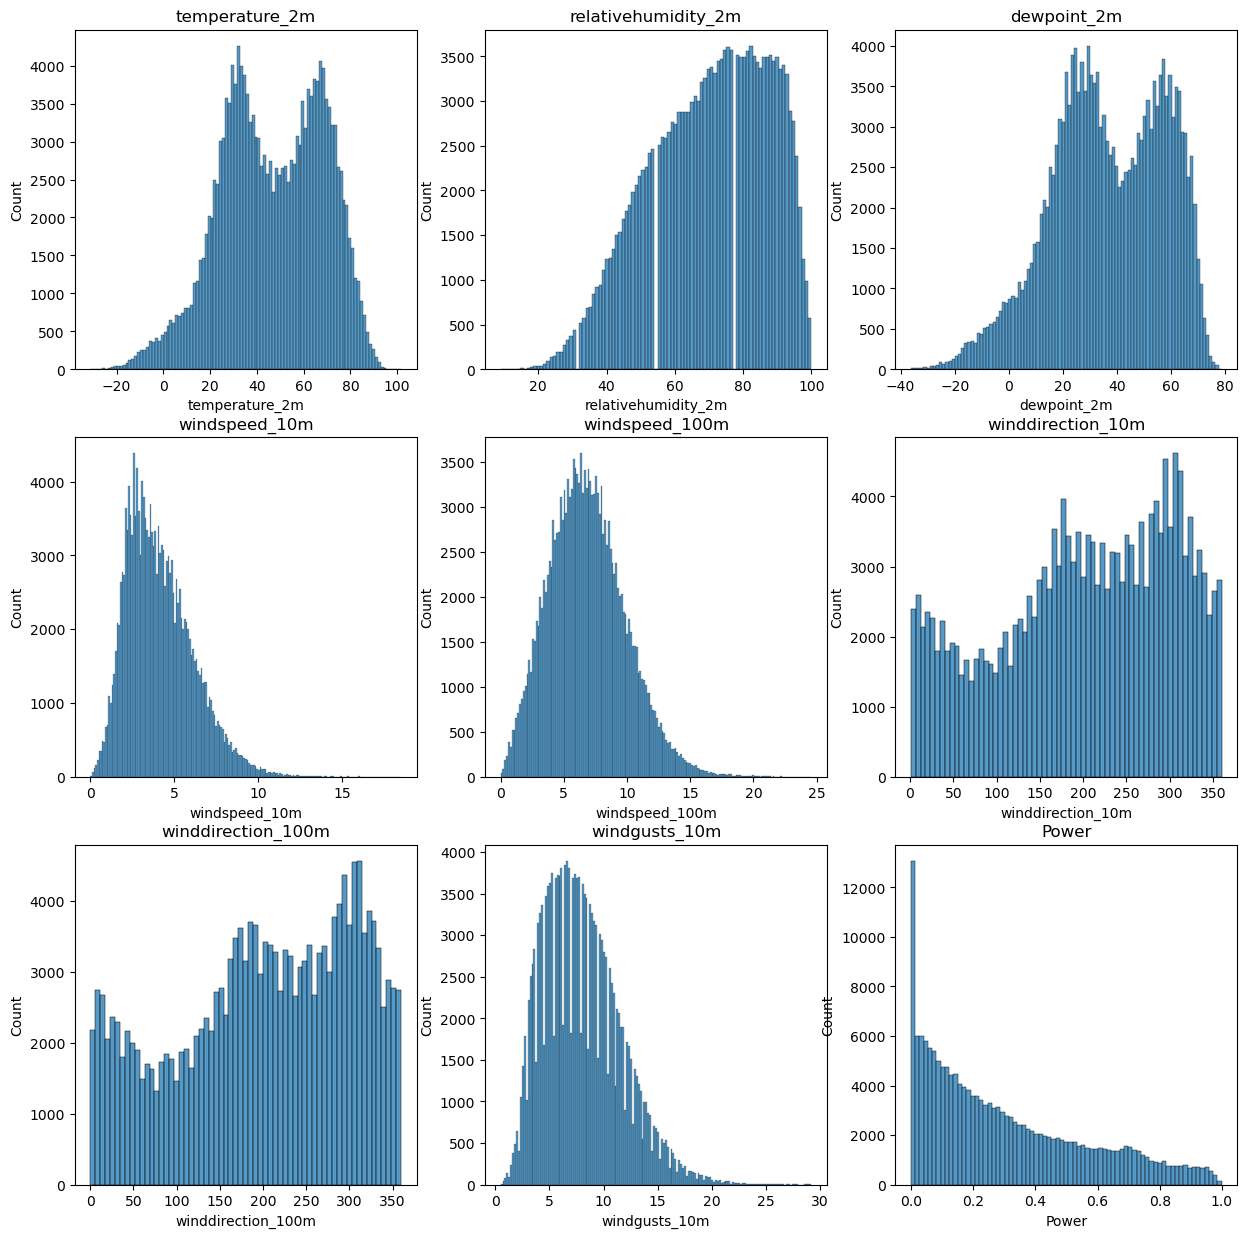

In [25]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes = axes.flatten()
for i, col in enumerate(numerical_col):
    sns.histplot(merge_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


IndexError: index 9 is out of bounds for axis 0 with size 9

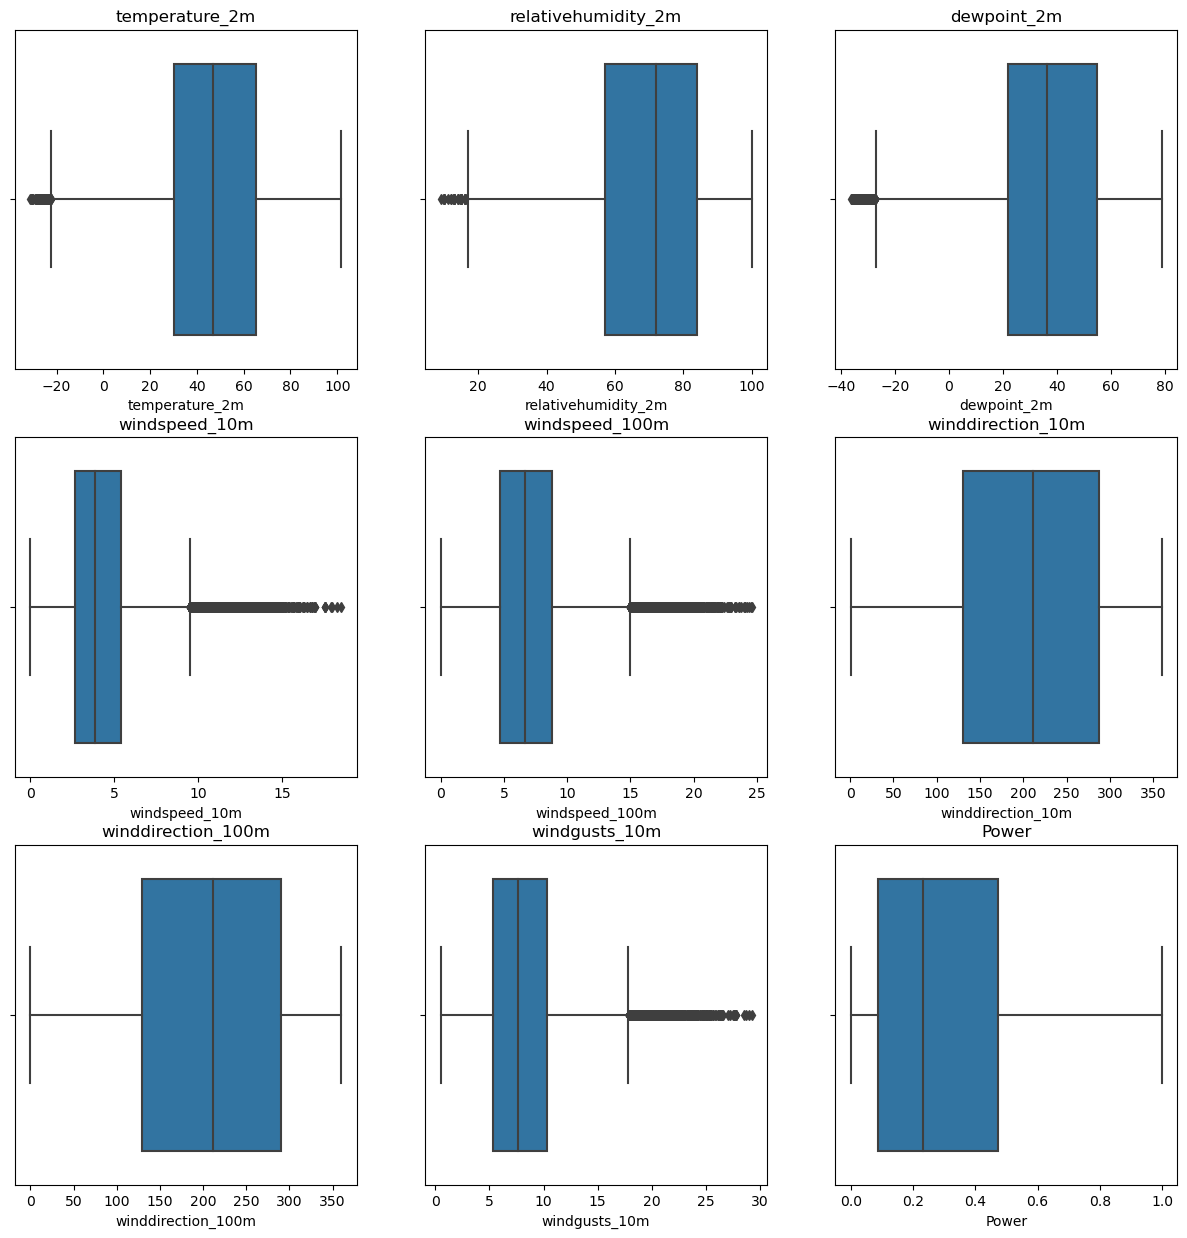

In [26]:
# box plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_col):
    sns.boxplot(x=merge_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


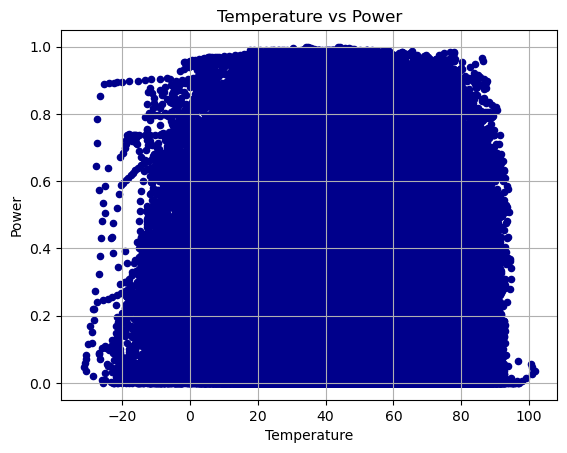

In [27]:
# scatterplot
merge_data.plot.scatter(x='temperature_2m', y='Power', color='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()


IndexError: index 8 is out of bounds for axis 0 with size 8

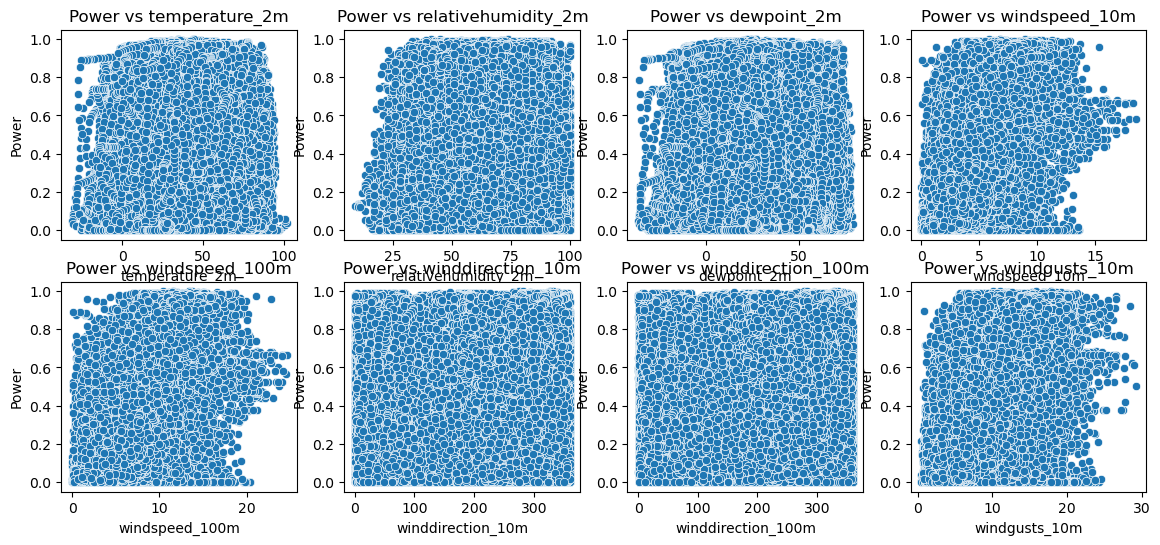

In [28]:

fig, axes = plt.subplots(2, 4, figsize=(14, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_col.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merge_data, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')

plt.tight_layout()
plt.show()


In [29]:
#correlation
correlation = merge_data[numerical_col].corr()
correlation

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
temperature_2m,1.000000,-0.173985,0.942370,-0.104589,-0.150422,-0.153010,-0.150095,0.010929,-0.141187,-0.103087,0.067397,0.004035
relativehumidity_2m,-0.173985,1.000000,0.160017,-0.162912,-0.034469,-0.107516,-0.113267,-0.270695,-0.031405,-0.035661,-0.062131,0.026702
dewpoint_2m,0.942370,0.160017,1.000000,-0.158822,-0.159134,-0.188577,-0.187519,-0.079240,-0.146789,-0.118606,0.047141,0.014839
windspeed_10m,-0.104589,-0.162912,-0.158822,1.000000,0.930667,0.141607,0.148542,0.929401,0.564750,0.153640,0.050620,-0.041757
windspeed_100m,-0.150422,-0.034469,-0.159134,0.930667,1.000000,0.146305,0.155401,0.827246,0.622108,0.131462,0.031916,-0.050542
winddirection_10m,-0.153010,-0.107516,-0.188577,0.141607,0.146305,1.000000,0.910205,0.139080,0.128059,0.040116,-0.039300,-0.012682
winddirection_100m,-0.150095,-0.113267,-0.187519,0.148542,0.155401,0.910205,1.000000,0.147822,0.136620,0.028766,-0.038087,-0.001027
windgusts_10m,0.010929,-0.270695,-0.079240,0.929401,0.827246,0.139080,0.147822,1.000000,0.568818,0.082875,0.015385,-0.055740
Power,-0.141187,-0.031405,-0.146789,0.564750,0.622108,0.128059,0.136620,0.568818,1.000000,-0.120096,0.009140,-0.117799
Location_Location2,-0.103087,-0.035661,-0.118606,0.153640,0.131462,0.040116,0.028766,0.082875,-0.120096,1.000000,-0.333333,-0.333333


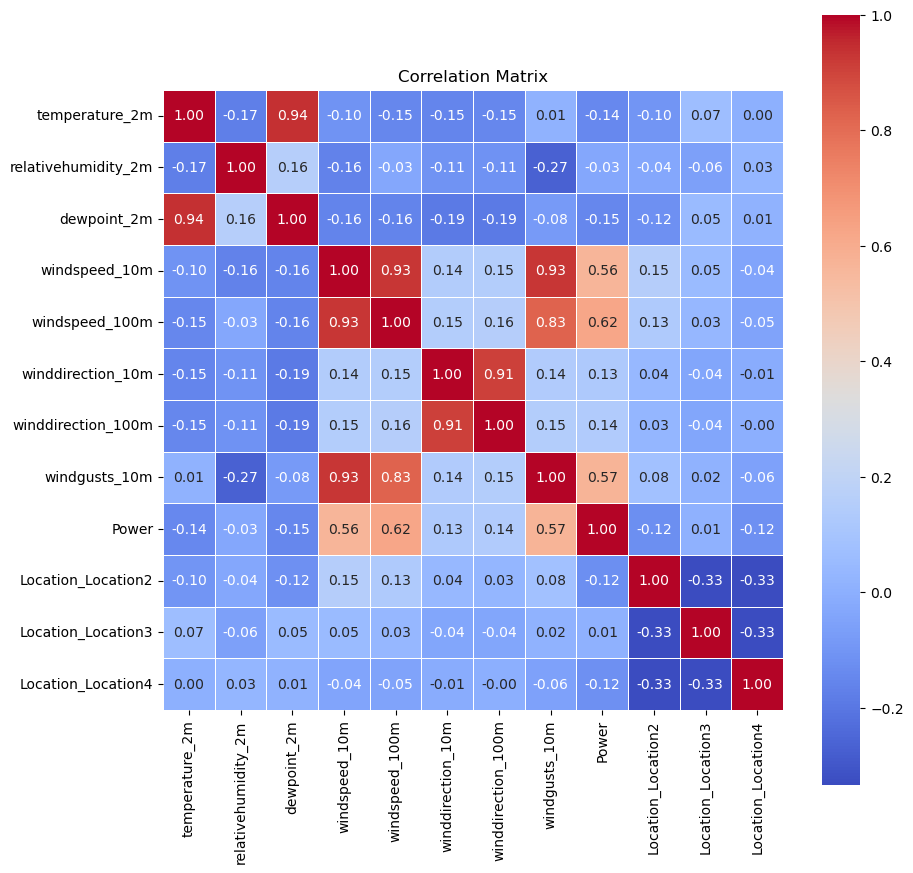

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [31]:
X=merge_data.drop("Power", axis=1)

In [32]:
X

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43795,25.5,94,24.0,4.01,6.66,4,8,8.2,0,0,1
43796,25.3,92,23.2,4.70,7.52,1,5,7.9,0,0,1
43797,24.9,90,22.5,4.61,7.57,4,8,7.9,0,0,1
43798,24.9,89,22.1,4.60,7.44,2,6,7.8,0,0,1


In [33]:
y=merge_data.iloc[:,-4]

In [34]:
y

0        0.1635
1        0.1424
2        0.1214
3        0.1003
4        0.0793
          ...  
43795    0.3417
43796    0.3342
43797    0.3267
43798    0.3192
43799    0.3117
Name: Power, Length: 175200, dtype: float64

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [36]:
print("X Train \n", X_train)
print("X Test \n", X_test)

X Train 
        temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  \
784              16.8                   61          5.9           3.10   
18228            -0.7                   69         -8.3           5.69   
42256            52.2                   49         33.4           7.36   
18970            -9.1                   69        -16.7           7.72   
2415             59.3                   33         30.0           1.82   
...               ...                  ...          ...            ...   
32279            53.2                   61         40.3           7.53   
16094            45.5                   87         41.7           3.45   
532              31.7                   96         30.8           2.95   
15467            72.0                   81         65.8           7.16   
34358            40.7                   42         19.7           4.87   

       windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
784              6.41 

In [37]:
print("y Train \n", y_train)
print("y Test \n", y_test)

y Train 
 784      0.3054
18228    0.2185
42256    0.1136
18970    0.2401
2415     0.0769
          ...  
32279    0.3014
16094    0.1750
532      0.0470
15467    0.3031
34358    0.2079
Name: Power, Length: 140160, dtype: float64
y Test 
 41775    0.0729
35863    0.0000
38719    0.0927
26937    0.0365
34437    0.1867
          ...  
38106    0.0000
12601    0.4076
18370    0.1398
6166     0.3254
14753    0.4437
Name: Power, Length: 35040, dtype: float64


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
#train using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
#model evaluation
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("Mean Squared Error",mse)
print("R Squared Score",r2)

Mean Absolute Error 0.1376585805337513
Mean Squared Error 0.03254230698731513
R Squared Score 0.5127994646410983


In [42]:
#train using random forest
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [43]:
y_pred_rf = rf_model.predict(X_test)


In [44]:
#model evaluation
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print("For Random Forest")
print("Mean Absolute Error",mae_rf)
print("Mean Squared Error",mse_rf)
print("R Squared Score",r2_rf)

For Random Forest
Mean Absolute Error 0.10662940119863015
Mean Squared Error 0.02155910436314834
R Squared Score 0.6772322505691262


In [45]:
#train using XGBoost Regressor model
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [46]:
y_pred_xgb =xgb_model.predict(X_test)

In [47]:
#model evaluation
mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
r2_xgb=r2_score(y_test,y_pred_xgb)
print("For XGBoost")
print("Mean Absolute Error",mae_xgb)
print("Mean Squared Error",mse_xgb)
print("R Squared Score",r2_xgb)

For XGBoost
Mean Absolute Error 0.11572619130940615
Mean Squared Error 0.024946639423317377
R Squared Score 0.6265164578779464


In [48]:
from sklearn.model_selection import GridSearchCV, train_test_split
# Define hyperparameter grid
param_grid = {
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  
    cv=3,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)


print(f'\nBest Parameters: {grid_search.best_params_}')
print(f'Best MAE (Cross-Validated): {-grid_search.best_score_:.4f}')

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'\nTuned Model Evaluation on Test Set:')
print(f'Mean Absolute Error (MAE): {mae_tuned:.4f}')
print(f'Mean Squared Error (MSE): {mse_tuned:.4f}')
print(f'R² Score: {r2_tuned:.4f}')



Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best MAE (Cross-Validated): 0.1137

Tuned Model Evaluation on Test Set:
Mean Absolute Error (MAE): 0.1132
Mean Squared Error (MSE): 0.0238
R² Score: 0.6430


In [ ]:
# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print(f'\n🔍 Random Forest - Best Parameters: {grid_search_rf.best_params_}')
print(f'Best MAE (Cross-Validated): {-grid_search_rf.best_score_:.4f}')

# Evaluate on test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\n📊 Random Forest Evaluation on Test Set:')
print(f'Mean Absolute Error (MAE): {mae_rf:.4f}')
print(f'Mean Squared Error (MSE): {mse_rf:.4f}')
print(f'R² Score: {r2_rf:.4f}')


In [ ]:
from sklearn.linear_model import Ridge

# Hyperparameter grid
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Grid search
grid_search_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid_ridge,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

grid_search_ridge.fit(X_train, y_train)

print(f'\n🔍 Ridge Regression - Best Alpha: {grid_search_ridge.best_params_}')
print(f'Best MAE (Cross-Validated): {-grid_search_ridge.best_score_:.4f}')

# Evaluate on test set
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('\n📊 Ridge Regression Evaluation on Test Set:')
print(f'Mean Absolute Error (MAE): {mae_ridge:.4f}')
print(f'Mean Squared Error (MSE): {mse_ridge:.4f}')
print(f'R² Score: {r2_ridge:.4f}')
